In [281]:
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

In [282]:
seed = 7
np.random.seed(seed)
dataset = pd.read_csv(r'C:\Users\Angus\Documents\hnh17-datascience\zurich.csv')
dataset.dropna(inplace=True)

In [283]:
#dataset['date'] = [x[11:] for x in dataset['date']]

In [284]:
# dataset = dataset[25:]

In [285]:
dataset.head()

,date,pm10,hour,T,P,wind,hum,traffic
0,19/08/2017 16:00,5.07,16,22.45,969.32,2.60,52,431.428571
1,19/08/2017 17:00,5.40,17,22.28,969.42,2.99,50,425.714286
2,19/08/2017 18:00,5.92,18,21.70,969.85,2.59,48,364.000000
3,19/08/2017 19:00,6.12,19,20.69,970.32,1.97,48,248.285714
4,19/08/2017 20:00,6.56,20,19.65,971.09,1.60,48,174.285714


In [286]:
# dataset['previousPM2'] = dataset['pm2.5'].shift(2)

In [287]:
# dataset['previousPM3'] = dataset['pm2.5'].shift(3)

In [288]:
# dataset['previousPM4'] = dataset['pm2.5'].shift(4)

In [289]:
# dataset['previousPM5'] = dataset['pm2.5'].shift(5)

In [290]:
#dataset['goodbad'] = np.where(dataset['pm2.5'] > 150, 1, 0)

In [291]:
dataset['goodbad'] = np.where(dataset['pm10'] > 10, 1, 0)

In [292]:
dataset.dropna(inplace=True)

In [293]:
dataset

,date,pm10,hour,T,P,wind,hum,traffic,goodbad
0,19/08/2017 16:00,5.07,16,22.45,969.32,2.60,52,431.428571,0
1,19/08/2017 17:00,5.40,17,22.28,969.42,2.99,50,425.714286,0
2,19/08/2017 18:00,5.92,18,21.70,969.85,2.59,48,364.000000,0
3,19/08/2017 19:00,6.12,19,20.69,970.32,1.97,48,248.285714,0
4,19/08/2017 20:00,6.56,20,19.65,971.09,1.60,48,174.285714,0
5,19/08/2017 21:00,6.55,21,19.17,971.82,1.46,59,159.142857,0
6,19/08/2017 22:00,7.47,22,18.56,972.26,1.15,55,179.142857,0
7,19/08/2017 23:00,7.67,23,17.85,972.35,0.80,61,184.857143,0
8,20/08/2017 00:00,7.96,0,16.97,972.19,0.95,66,136.571429,0
9,20/08/2017 01:00,6.94,1,16.80,972.19,0.64,65,91.142857,0


In [294]:
import matplotlib.pyplot as plt

In [295]:
plt.scatter(dataset['wind'],dataset['pm10'])

In [296]:
plt.xlabel('wind')
plt.ylabel('pm10')

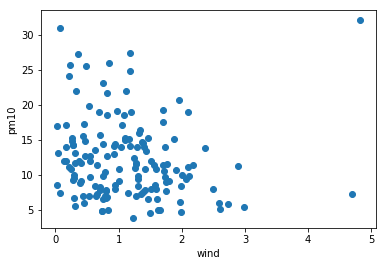

In [297]:
plt.show()

In [298]:
# from sklearn.preprocessing import LabelEncoder

In [299]:
# enc = LabelEncoder()
# enc.fit(dataset['cbwd'])
# dataset['cbwd'] = enc.transform(dataset['cbwd'])
# dataset['previousCbwd'] = enc.transform(dataset['previousCbwd'])
# dataset['previousCbwd2'] = enc.transform(dataset['previousCbwd2'])

In [300]:
data = dataset.values

In [301]:
data

array([['19/08/2017 16:00', 5.07, 16, ..., 52, 431.42857139999995, 0],
       ['19/08/2017 17:00', 5.4, 17, ..., 50, 425.7142857, 0],
       ['19/08/2017 18:00', 5.92, 18, ..., 48, 364.0, 0],
       ..., 
       ['25/08/2017 21:00', 16.35, 21, ..., 67, 204.8571429, 1],
       ['25/08/2017 22:00', 19.08, 22, ..., 67, 195.4285714, 1],
       ['25/08/2017 23:00', 15.31, 23, ..., 77, 146.8571429, 1]], dtype=object)

In [302]:
### split the data into training and test data

In [303]:
### split into features and labels
# PM 2.5 is on index 0

In [304]:
size = data[0].size
X = data[:,5]
Y = data[:,1]

In [328]:
X

array([2.6, 2.99, 2.59, 1.97, 1.6, 1.46, 1.15, 0.8, 0.95, 0.64, 0.71, 1.35,
       0.81, 0.44, 0.8, 2.49, 1.98, 0.78, 0.3, 0.45, 0.83, 0.74, 1.49,
       1.63, 1.66, 1.99, 1.22, 0.73, 0.31, 0.76, 1.42, 1.39, 0.65, 0.07,
       0.53, 1.28, 1.75, 1.59, 1.59, 1.1, 1.7, 0.82, 1.18, 1.7, 0.82, 1.1,
       0.62, 0.78, 0.29, 0.71, 1.58, 1.72, 0.75, 0.39, 1.01, 0.02, 0.8,
       1.51, 2.06, 1.31, 1.28, 1.51, 1.29, 2.09, 0.69, 1.11, 1.0, 1.74,
       1.26, 1.25, 1.41, 2.17, 1.27, 1.7, 1.79, 2.12, 1.3, 0.41, 0.95,
       0.63, 1.75, 2.01, 1.91, 2.1, 1.77, 1.56, 1.4, 1.96, 1.18, 0.84,
       0.23, 0.35, 0.33, 1.06, 0.92, 1.16, 0.94, 2.36, 1.88, 1.44, 0.16,
       0.7, 1.33, 0.31, 0.46, 0.76, 0.37, 0.22, 0.46, 0.17, 0.03, 0.07,
       0.48, 0.22, 0.76, 1.2, 0.17, 1.74, 4.82, 2.89, 4.7, 2.73, 1.3, 0.54,
       0.27, 0.53, 0.29, 0.54, 0.14, 0.31, 0.24, 1.18, 0.28, 1.04, 1.37,
       0.82, 0.04, 0.44, 0.26, 0.26, 0.65, 0.4, 1.38, 0.92, 0.54, 0.28,
       0.45, 1.09, 1.34, 0.97, 1.46], dtype=object)

In [306]:
from sklearn.model_selection import train_test_split

In [314]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

In [329]:
X_train.reshape(1,-1)
X_test.reshape(1,-1)
Y_train.reshape(1,-1)
Y_test.reshape(1,-1)

array([[23.16, 7.94, 9.16, 11.49, 27.45, 19.08, 11.51, 32.09, 5.92, 17.19,
        12.04, 15.24, 15.75, 9.61, 10.83, 19.83, 7.47, 6.61, 11.36, 8.46,
        8.46, 12.67, 12.98, 8.59, 7.93, 7.31, 6.99, 22.05, 4.95, 4.92, 15.3]], dtype=object)

In [330]:
from sklearn.linear_model import LinearRegression

In [331]:
linear_model = LinearRegression()

In [332]:
linear_model.fit(X_train, Y_train)

c:\users\angus\miniconda3\envs\keras-ml\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: Found input variables with inconsistent numbers of samples: [1, 120]

In [323]:
linear_model.score(X_test, Y_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [324]:
linear_model.predict(X_test)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [ ]:
# create model
model = Sequential()
model.add(Dense(5, input_dim=X_train[1].size, activation='relu'))
model.add(Dense(10, activation='relu'))
#model.add(Dense(20, activation='relu'))
model.add(Dense(1, activation='linear'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(
    X_train,
    Y_train,
    epochs=30,
    batch_size=10
)

In [ ]:
scores = model.evaluate(X_test, Y_test)

In [ ]:
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
tester = [[22,23.64,966.52,1.33,70,195.4285714]]
tester2 = [[7,20.6,968.16,0.07,90,682]]


In [ ]:
tester2

In [ ]:
tester2 = np.array(tester2)

In [ ]:
model.predict(tester2)